In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import matplotlib.ticker as mticker

from matplotlib.dates import DateFormatter
from datetime import timedelta

billboard_hot_100 = pd.read_csv("../billboard_hot_100.csv")
billboard_hot_100["first_day_of_the_week"] = pd.to_datetime(billboard_hot_100["first_day_of_the_week"],
                                                            infer_datetime_format=True)
billboard_hot_100["year"] = billboard_hot_100["first_day_of_the_week"].dt.year
billboard_hot_100["max_weeks_on_chart"] = billboard_hot_100.groupby(["artist", "song_name"])["weeks_on_chart"].transform("max")
billboard_hot_100["top_position"] = billboard_hot_100.groupby(["artist", "song_name"])["position"].transform("min")

C:\Users\cutie\AppData\Local\Temp\ipykernel_36604\3412998217.py:13: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  billboard_hot_100["first_day_of_the_week"] = pd.to_datetime(billboard_hot_100["first_day_of_the_week"],


In [2]:
# https://stackoverflow.com/questions/13728392/moving-average-or-running-mean
def moving_average(x, w):
    return np.convolve(x, np.ones(w) / w, 'valid')

In [3]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

Before Peak:                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     40.56
Date:                Sun, 19 Jan 2025   Prob (F-statistic):           6.83e-07
Time:                        18:56:00   Log-Likelihood:                -83.670
No. Observations:                  30   AIC:                             171.3
Df Residuals:                      28   BIC:                             174.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1117.6937    169.669      6

Text(0, 0.5, 'Avg. top position')

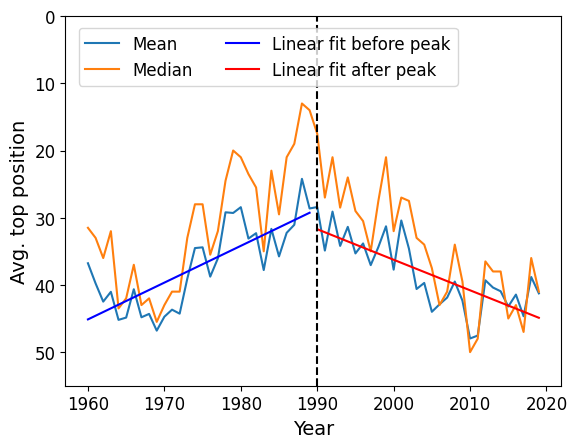

In [10]:
import statistics
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = billboard_hot_100[~((billboard_hot_100["artist"].str.lower().str.contains("featuring")) |\
        (billboard_hot_100["artist"].str.lower().str.contains("&")))]
songs_numbers_count = df[["year", "artist", "song_name"]].groupby(["year", "artist"])["song_name"].nunique().reset_index(name="number_of_songs")

averages = []
medians = []

for year in range(1960, 2020):
    songs_until_year = songs_numbers_count[songs_numbers_count["year"] <= year].copy()
    songs_until_year["total_number_of_songs"] = songs_until_year.groupby(["artist"])["number_of_songs"].transform("sum")
    songs_until_year["hitmaker"] = songs_until_year["total_number_of_songs"] > 10
    hitmakers = songs_until_year[songs_until_year["hitmaker"] == True]['artist']
    hitmakers_songs = billboard_hot_100[billboard_hot_100["artist"].isin(hitmakers) & (billboard_hot_100["year"] == year)].groupby(['artist', 'song_name', 'top_position']).first().reset_index()
    averages.append(hitmakers_songs["top_position"].mean())
    medians.append(hitmakers_songs["top_position"].median())

peak = 1990

x1, y1 = range(1960, 1990), averages[:30]
x2, y2 = range(1990, 2020), averages[30:]

model1 = sm.OLS(y1, sm.add_constant(x1)).fit()
model2 = sm.OLS(y2, sm.add_constant(x2)).fit()

print("Before Peak:", model1.summary())
print("After Peak:", model2.summary())

plt.plot(range(1960, 2020), averages)
plt.plot(range(1960, 2020), medians)

plt.plot(x1, model1.predict(sm.add_constant(x1)), label="Before Peak Fit", color='blue')
plt.plot(x2, model2.predict(sm.add_constant(x2)), label="After Peak Fit", color='red')
plt.axvline(x=peak, linestyle='--', color='black', label="Peak")

# plt.fill_between(range(1960, 2020), np.array(averages) - np.array(stds), np.array(averages) + np.array(stds), alpha=0.3)
plt.gca().invert_yaxis()
plt.legend(["Mean", 'Median', 'Linear fit before peak', 'Linear fit after peak'], ncol=2, loc="upper left", bbox_to_anchor=(0.01, 0.99))
plt.ylim([55, 0])
plt.xlabel("Year")
plt.ylabel("Avg. top position")

Percentage of songs by htimakers 0.10803004043905257
Variance 748.3306068903557
top_position
1    150
2     66
3     66
4     57
5     66
Name: count, dtype: int64


C:\Users\cutie\AppData\Local\Temp\ipykernel_35408\805658296.py:27: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([0, 500])


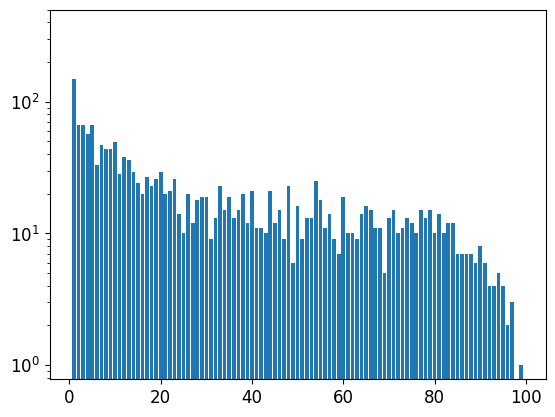

In [33]:
df = billboard_hot_100[~((billboard_hot_100["artist"].str.lower().str.contains("featuring")) |\
        (billboard_hot_100["artist"].str.lower().str.contains("&")))]
songs_numbers_count = df[["year", "artist", "song_name"]].groupby(["year", "artist"])["song_name"].nunique().reset_index(name="number_of_songs")

averages = []
stds = []

songs_until_year = songs_numbers_count[songs_numbers_count["year"] <= 1990].copy()
songs_until_year["total_number_of_songs"] = songs_until_year.groupby(["artist"])["number_of_songs"].transform("sum")
songs_until_year["hitmaker"] = songs_until_year["total_number_of_songs"] > 10
hitmakers = songs_until_year[songs_until_year["hitmaker"] == True]['artist']
hitmakers_songs = billboard_hot_100[billboard_hot_100["artist"].isin(hitmakers) & (billboard_hot_100["year"].isin(range(1980, 1991)))].groupby(['artist', 'song_name']).first().copy()
percentage = billboard_hot_100[billboard_hot_100["artist"].isin(hitmakers) & (billboard_hot_100["year"].isin(range(1980, 1991)))].groupby(['artist', 'song_name']).count().shape[0] / billboard_hot_100[billboard_hot_100["year"] <= 1990].groupby(['artist', 'song_name']).count().shape[0]
print(f'Percentage of songs by htimakers {percentage}')
data = hitmakers_songs["top_position"].value_counts().sort_index()
variance1 = np.var(hitmakers_songs["top_position"])
n1 = len(hitmakers_songs["top_position"])
data1 = hitmakers_songs["top_position"].values
print(f'Variance {statistics.variance(hitmakers_songs["top_position"])}')

print(data.head())
plt.bar(data.index, data.values)
# plt.gca().invert_yaxis()
# plt.fill_between(range(1960, 2020), np.array(averages) - np.array(stds), np.array(averages) + np.array(stds), alpha=0.3)
# plt.legend(["Mean", "Standard error"], ncol=2, loc="upper left", bbox_to_anchor=(0.01, 1.35))
plt.yscale("log")
plt.ylim([0, 500])
# plt.xlabel("Year")
# plt.ylabel("Avg. top position")
plt.show()

Percentage of songs by htimakers 0.2232187846417414
Variance 826.9618659015784
top_position
1    79
2    37
3    20
4    22
5    21
Name: count, dtype: int64


C:\Users\cutie\AppData\Local\Temp\ipykernel_35408\1507899369.py:27: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([0, 500])


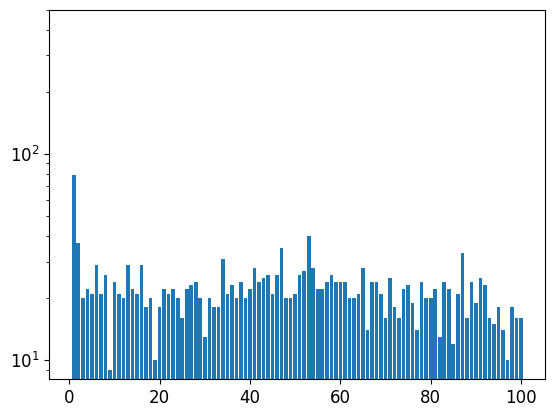

In [34]:
df = billboard_hot_100[~((billboard_hot_100["artist"].str.lower().str.contains("featuring")) |\
        (billboard_hot_100["artist"].str.lower().str.contains("&")))]
songs_numbers_count = df[["year", "artist", "song_name"]].groupby(["year", "artist"])["song_name"].nunique().reset_index(name="number_of_songs")

averages = []
stds = []

songs_until_year = songs_numbers_count[songs_numbers_count["year"] <= 2020].copy()
songs_until_year["total_number_of_songs"] = songs_until_year.groupby(["artist"])["number_of_songs"].transform("sum")
songs_until_year["hitmaker"] = songs_until_year["total_number_of_songs"] > 10
hitmakers = songs_until_year[songs_until_year["hitmaker"] == True]['artist']
hitmakers_songs = billboard_hot_100[billboard_hot_100["artist"].isin(hitmakers) & (billboard_hot_100["year"].isin(range(2010, 2021)))].groupby(['artist', 'song_name']).first().copy()
percentage = billboard_hot_100[billboard_hot_100["artist"].isin(hitmakers) & (billboard_hot_100["year"].isin(range(2010, 2021)))].groupby(['artist', 'song_name']).count().shape[0] / billboard_hot_100[billboard_hot_100["year"] >= 2000].groupby(['artist', 'song_name']).count().shape[0]
print(f'Percentage of songs by htimakers {percentage}')
data = hitmakers_songs["top_position"].value_counts().sort_index()
variance2 = np.var(hitmakers_songs["top_position"])
n2 = len(hitmakers_songs["top_position"])
data2 = hitmakers_songs["top_position"].values
print(f'Variance {statistics.variance(hitmakers_songs["top_position"])}')

print(data.head())
plt.bar(data.index, data.values)
# plt.gca().invert_yaxis()
# plt.fill_between(range(1960, 2020), np.array(averages) - np.array(stds), np.array(averages) + np.array(stds), alpha=0.3)
# plt.legend(["Mean", "Standard error"], ncol=2, loc="upper left", bbox_to_anchor=(0.01, 1.35))
plt.yscale("log")
plt.ylim([0, 500])
# plt.xlabel("Year")
# plt.ylabel("Avg. top position")
plt.show()

# F-test

In [40]:
import scipy.stats as stats
from scipy.stats import levene

stat, p_value = levene(data1, data2) 

if p_value < 0.05:
    print(f"Variances are significantly different (p = {p_value:.3f})")
else:
    print(f"Variances are not significantly different (p = {p_value:.3f})")


Variances are significantly different (p = 0.001)


 https://pubsonline.informs.org/doi/abs/10.1287/mnsc.2023.4743

(0.0, 1.0)

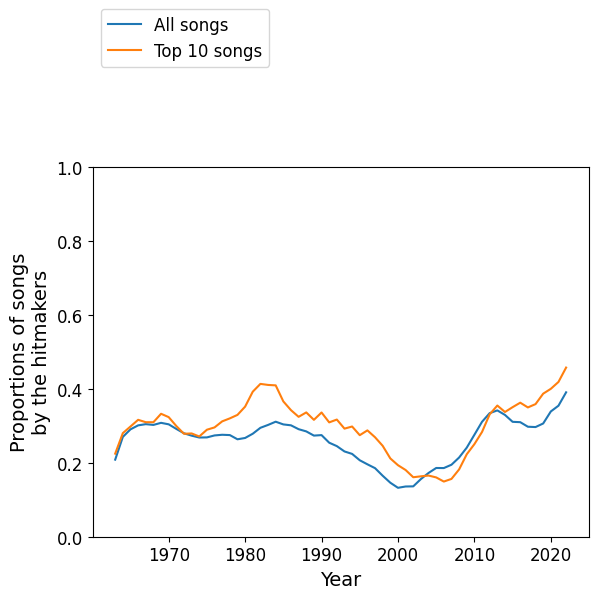

In [41]:
averages = []
averages_10 = []
medians = []

for year in range(1959, 2023):
    songs_until_year = songs_numbers_count[songs_numbers_count["year"] <= year].copy()
    songs_until_year["total_number_of_songs"] = songs_until_year.groupby(["artist"])["number_of_songs"].transform("sum")
    songs_until_year["hitmaker"] = songs_until_year["total_number_of_songs"] > 10
    hitmakers = songs_until_year[songs_until_year["hitmaker"] == True]['artist']
    songs_from_this_year = billboard_hot_100[billboard_hot_100["year"] == year][["artist", 'song_name']].drop_duplicates()
    songs_from_this_year['hitmaker'] = songs_from_this_year["artist"].isin(hitmakers)
    averages.append(songs_from_this_year["hitmaker"].mean())

    songs_data_from_this_year = billboard_hot_100[billboard_hot_100["year"] == year][["artist", "song_name", "top_position"]].drop_duplicates().copy()
    songs_data_from_this_year = songs_data_from_this_year[songs_data_from_this_year["top_position"] <= 10]
    songs_data_from_this_year["hitmaker"] = songs_data_from_this_year["artist"].isin(hitmakers)
    averages_10.append(songs_data_from_this_year["hitmaker"].mean())
    
plt.plot(range(1959, 2023)[4:], moving_average(averages, 5))
plt.plot(range(1959, 2023)[4:], moving_average(averages_10, 5))
plt.xlabel("Year")
plt.ylabel("Proportions of songs\nby the hitmakers")
plt.legend(["All songs", "Top 10 songs"], loc="upper left", bbox_to_anchor=(0, 0.85))
plt.ylim([0, 1])

# K-S test

In [26]:
from scipy.stats import ks_2samp

statistic, p_value = ks_2samp(data1, data2)
print(f"K-S Statistic: {statistic}")
print(f"P-value: {p_value}")

# distributions are different in terms of shapes

K-S Statistic: 0.10945875343949393
P-value: 2.9676978044326505e-09


In [27]:
from scipy.stats import mannwhitneyu

statistic, p_value = mannwhitneyu(data1, data2, alternative="two-sided")

print(f"Mann Whitneyu Statistic: {statistic}")
print(f"P-value: {p_value}")

# the distributions are different in term of median

Mann Whitneyu Statistic: 1334388.5
P-value: 7.98029998634783e-09


In [28]:
from scipy.stats import mannwhitneyu

statistic, p_value = mannwhitneyu(data1, data2, alternative="less")

print(f"Mann Whitneyu Statistic: {statistic}")
print(f"P-value: {p_value}")

# data1 (1970-2005) has lower median (lower -> better position) than data2 (since 2005)

Mann Whitneyu Statistic: 1334388.5
P-value: 3.990149993173915e-09


In [29]:
# for averages (one is higher than etc) use permutation test
# for medians (one is higher than the other etc) use Mann whithney u/mood's/permutation median